In [5]:
!pip install keras==2.8

In [6]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [7]:
from tensorflow import keras 
keras.__version__

'2.8.0'

### Introduction to Artificial Neural Networks with Keras

The code here is pasted from Chapter 10 of Aurélien Géron's book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow.

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

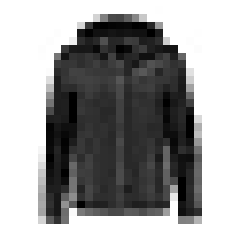

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
#class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 #              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.layers

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.5316 - val_accuracy: 0.7990
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4125 - accuracy: 0.8565 - val_loss: 0.3913 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3939 - accuracy: 0.8619 - val_loss: 0.3750 - val_accuracy: 0.8690
Epoch 6/30
 655/1719 [==========>...................] - ETA: 6s - loss: 0.3769 - accuracy: 0.8679

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()